In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


In [2]:
# importing data
data=pd.read_csv("C:/Users/dell/Documents/DS_Assignments/16_Neural_Networks/forestfires.csv")

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
#checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<AxesSubplot:xlabel='area', ylabel='Density'>

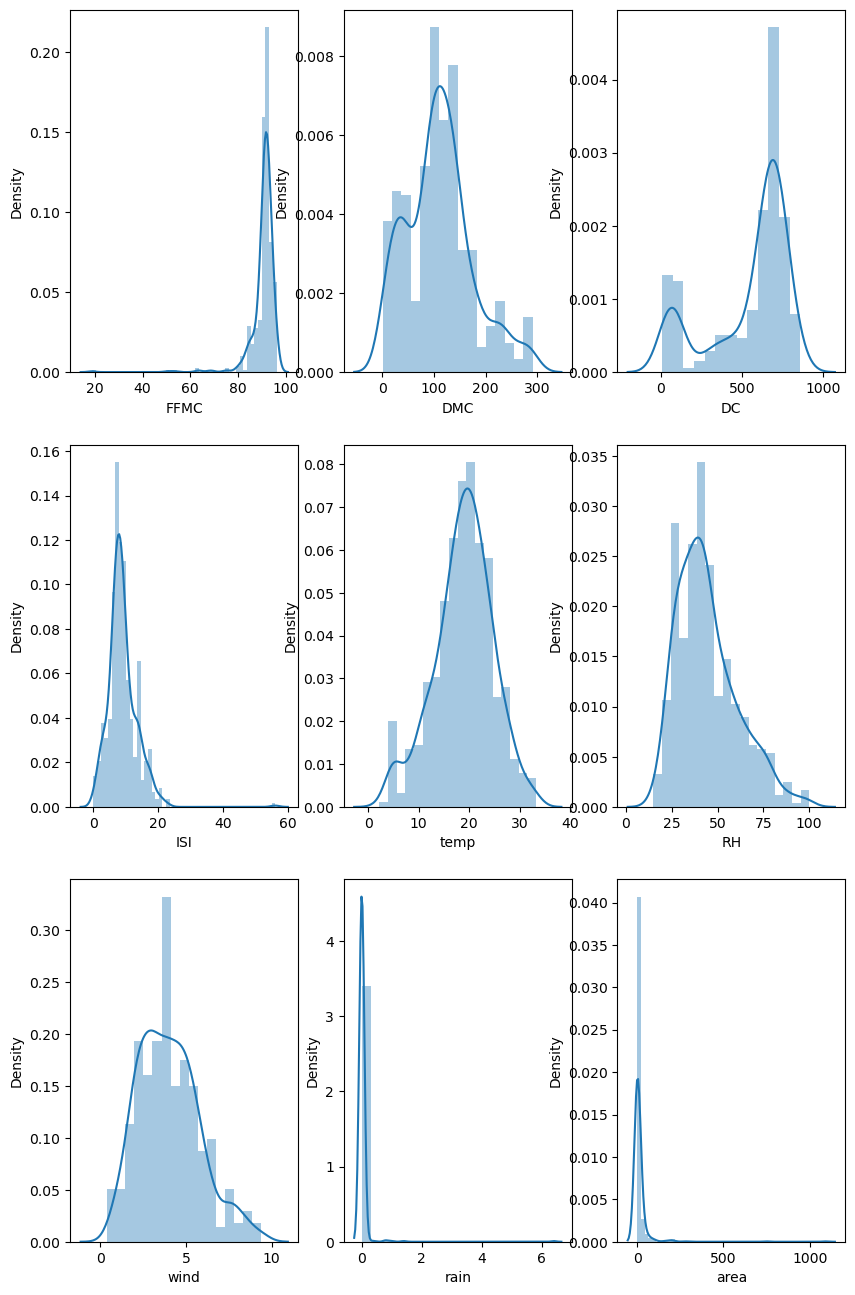

In [6]:
fig,axs=plt.subplots(3,3,figsize=(10,16))
sns.distplot(data.FFMC,ax=axs[0,0])
sns.distplot(data.DMC,ax=axs[0,1])
sns.distplot(data.DC,ax=axs[0,2])
sns.distplot(data.ISI,ax=axs[1,0])
sns.distplot(data.temp,ax=axs[1,1])
sns.distplot(data.RH,ax=axs[1,2])
sns.distplot(data.wind,ax=axs[2,0])
sns.distplot(data.rain,ax=axs[2,1])
sns.distplot(data.area,ax=axs[2,2])

In [7]:
### Label encoding the size category column
data.loc[data.size_category=='small','size_category']=0
data.loc[data.size_category=='large','size_category']=1

In [8]:
data.drop(['month','day'],axis=1, inplace=True)
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [10]:
y=y.astype('float')

In [11]:
ss=preprocessing.StandardScaler()
X=ss.fit_transform(X)

In [12]:
def plot(model_fit):
    import matplotlib.pyplot as plt
    plt.plot(model_fit.history['accuracy'])
    plt.plot(model_fit.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [13]:
#Building model
model1=Sequential()
model1.add(Dense(28,  activation='relu'))
model1.add(Dense(28,  activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [14]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model_fit=model1.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 2s 107ms/step - loss: 0.5842 - accuracy: 0.7543 - val_loss: 0.6692 - val_accuracy: 0.6725
Epoch 2/250
7/7 [==============================] - 0s 19ms/step - loss: 0.5534 - accuracy: 0.7630 - val_loss: 0.6675 - val_accuracy: 0.6784
Epoch 3/250
7/7 [==============================] - 0s 14ms/step - loss: 0.5316 - accuracy: 0.7630 - val_loss: 0.6703 - val_accuracy: 0.6784
Epoch 4/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5144 - accuracy: 0.7775 - val_loss: 0.6752 - val_accuracy: 0.6784
Epoch 5/250
7/7 [==============================] - 0s 14ms/step - loss: 0.5027 - accuracy: 0.7803 - val_loss: 0.6791 - val_accuracy: 0.6842
Epoch 6/250
7/7 [==============================] - 0s 14ms/step - loss: 0.4913 - accuracy: 0.7832 - val_loss: 0.6805 - val_accuracy: 0.6842
Epoch 7/250
7/7 [==============================] - 0s 14ms/step - loss: 0.4813 - accuracy: 0.7861 - val_loss: 0.6803 - val_accuracy: 0.6842
Epoch 8/250
7/7 [==

7/7 [==============================] - 0s 13ms/step - loss: 0.1580 - accuracy: 0.9566 - val_loss: 0.9527 - val_accuracy: 0.7368
Epoch 60/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1526 - accuracy: 0.9566 - val_loss: 0.9663 - val_accuracy: 0.7368
Epoch 61/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1496 - accuracy: 0.9538 - val_loss: 0.9749 - val_accuracy: 0.7368
Epoch 62/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1455 - accuracy: 0.9509 - val_loss: 0.9833 - val_accuracy: 0.7251
Epoch 63/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1417 - accuracy: 0.9595 - val_loss: 0.9981 - val_accuracy: 0.7135
Epoch 64/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1388 - accuracy: 0.9624 - val_loss: 1.0034 - val_accuracy: 0.7193
Epoch 65/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1341 - accuracy: 0.9624 - val_loss: 1.0091 - val_accuracy: 0.7193
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.9971 - val_loss: 1.4227 - val_accuracy: 0.7485
Epoch 118/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 1.4279 - val_accuracy: 0.7485
Epoch 119/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 1.4267 - val_accuracy: 0.7485
Epoch 120/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0326 - accuracy: 0.9971 - val_loss: 1.4363 - val_accuracy: 0.7544
Epoch 121/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0316 - accuracy: 0.9942 - val_loss: 1.4644 - val_accuracy: 0.7485
Epoch 122/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 1.4610 - val_accuracy: 0.7485
Epoch 123/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 1.4476 - val_accuracy: 0.7602
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.6958 - val_accuracy: 0.7895
Epoch 176/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.6900 - val_accuracy: 0.7953
Epoch 177/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.6905 - val_accuracy: 0.8012
Epoch 178/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.7015 - val_accuracy: 0.8012
Epoch 179/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.7110 - val_accuracy: 0.7953
Epoch 180/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.7126 - val_accuracy: 0.7953
Epoch 181/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.7161 - val_accuracy: 0.7953
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.8754 - val_accuracy: 0.8129
Epoch 234/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.8923 - val_accuracy: 0.8187
Epoch 235/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.8962 - val_accuracy: 0.8129
Epoch 236/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.8952 - val_accuracy: 0.8187
Epoch 237/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.8902 - val_accuracy: 0.8129
Epoch 238/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.8950 - val_accuracy: 0.8129
Epoch 239/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.9065 - val_accuracy: 0.8187
Epoch 

In [16]:
model1.evaluate(X,y)

17/17 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.9400


[0.6409832835197449, 0.9400386810302734]

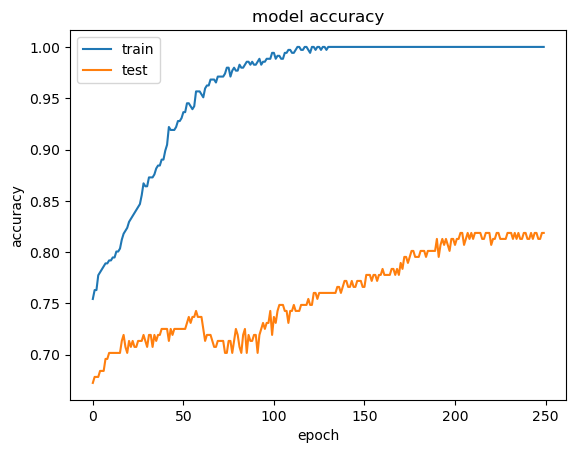

In [17]:
plot(model_fit)
    

### Validation accuracy is less

In [18]:
### Building a new model with reduced number of hidden layer nodes
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_fit2=model2.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 58ms/step - loss: 0.6821 - accuracy: 0.5983 - val_loss: 0.7228 - val_accuracy: 0.5848
Epoch 2/250
7/7 [==============================] - 0s 12ms/step - loss: 0.6294 - accuracy: 0.7168 - val_loss: 0.7095 - val_accuracy: 0.6257
Epoch 3/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5948 - accuracy: 0.7572 - val_loss: 0.7027 - val_accuracy: 0.6608
Epoch 4/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5715 - accuracy: 0.7630 - val_loss: 0.7009 - val_accuracy: 0.6667
Epoch 5/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5517 - accuracy: 0.7659 - val_loss: 0.7001 - val_accuracy: 0.6667
Epoch 6/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5361 - accuracy: 0.7659 - val_loss: 0.7005 - val_accuracy: 0.6725
Epoch 7/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5208 - accuracy: 0.7717 - val_loss: 0.6995 - val_accuracy: 0.6725
Epoch 8/250
7/7 [===

7/7 [==============================] - 0s 13ms/step - loss: 0.2214 - accuracy: 0.9104 - val_loss: 0.7446 - val_accuracy: 0.7544
Epoch 60/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2170 - accuracy: 0.9162 - val_loss: 0.7437 - val_accuracy: 0.7485
Epoch 61/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2132 - accuracy: 0.9277 - val_loss: 0.7448 - val_accuracy: 0.7544
Epoch 62/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2088 - accuracy: 0.9277 - val_loss: 0.7490 - val_accuracy: 0.7602
Epoch 63/250
7/7 [==============================] - 0s 13ms/step - loss: 0.2050 - accuracy: 0.9249 - val_loss: 0.7551 - val_accuracy: 0.7544
Epoch 64/250
7/7 [==============================] - 0s 12ms/step - loss: 0.2002 - accuracy: 0.9277 - val_loss: 0.7608 - val_accuracy: 0.7485
Epoch 65/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1980 - accuracy: 0.9249 - val_loss: 0.7639 - val_accuracy: 0.7544
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 12ms/step - loss: 0.0664 - accuracy: 0.9855 - val_loss: 0.9629 - val_accuracy: 0.7895
Epoch 118/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0659 - accuracy: 0.9884 - val_loss: 0.9703 - val_accuracy: 0.7953
Epoch 119/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0640 - accuracy: 0.9855 - val_loss: 0.9670 - val_accuracy: 0.8012
Epoch 120/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0631 - accuracy: 0.9855 - val_loss: 0.9683 - val_accuracy: 0.7953
Epoch 121/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0625 - accuracy: 0.9855 - val_loss: 0.9796 - val_accuracy: 0.8012
Epoch 122/250
7/7 [==============================] - 0s 14ms/step - loss: 0.0604 - accuracy: 0.9884 - val_loss: 0.9847 - val_accuracy: 0.8012
Epoch 123/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0597 - accuracy: 0.9855 - val_loss: 0.9816 - val_accuracy: 0.8070
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.1582 - val_accuracy: 0.8246
Epoch 176/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 1.1547 - val_accuracy: 0.8246
Epoch 177/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 1.1572 - val_accuracy: 0.8304
Epoch 178/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 1.1635 - val_accuracy: 0.8246
Epoch 179/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 1.1709 - val_accuracy: 0.8187
Epoch 180/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 1.1720 - val_accuracy: 0.8304
Epoch 181/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 1.1731 - val_accuracy: 0.8363
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.3350 - val_accuracy: 0.8363
Epoch 234/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.3405 - val_accuracy: 0.8363
Epoch 235/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.3417 - val_accuracy: 0.8421
Epoch 236/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 1.3400 - val_accuracy: 0.8421
Epoch 237/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.3451 - val_accuracy: 0.8421
Epoch 238/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.3485 - val_accuracy: 0.8421
Epoch 239/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.3521 - val_accuracy: 0.8421
Epoch 

In [19]:
model2.evaluate(X,y)

17/17 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.9478


[0.4626706838607788, 0.9477756023406982]

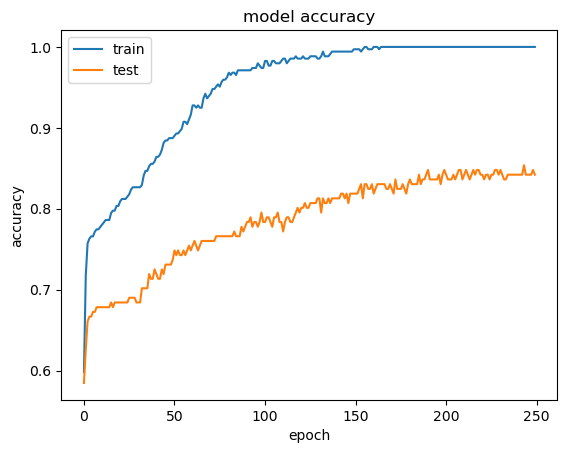

In [20]:
plot(model_fit2)


In [21]:
### Validation accuracy is better than model1

In [22]:
### Building a new model with adding new hidden layer nodes
model3=Sequential()
model3.add(Dense(28,  activation='relu'))
model3.add(Dense(14,  activation='relu'))
model3.add(Dense(14,  activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_fit3=model3.fit(X, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 2s 65ms/step - loss: 0.6594 - accuracy: 0.6156 - val_loss: 0.6801 - val_accuracy: 0.6082
Epoch 2/250
7/7 [==============================] - 0s 13ms/step - loss: 0.6272 - accuracy: 0.7168 - val_loss: 0.6769 - val_accuracy: 0.6725
Epoch 3/250
7/7 [==============================] - 0s 12ms/step - loss: 0.6023 - accuracy: 0.7630 - val_loss: 0.6769 - val_accuracy: 0.6784
Epoch 4/250
7/7 [==============================] - 0s 14ms/step - loss: 0.5864 - accuracy: 0.7630 - val_loss: 0.6797 - val_accuracy: 0.6784
Epoch 5/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5723 - accuracy: 0.7601 - val_loss: 0.6830 - val_accuracy: 0.6784
Epoch 6/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5614 - accuracy: 0.7601 - val_loss: 0.6873 - val_accuracy: 0.6784
Epoch 7/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5512 - accuracy: 0.7601 - val_loss: 0.6888 - val_accuracy: 0.6784
Epoch 8/250
7/7 [===

7/7 [==============================] - 0s 13ms/step - loss: 0.1762 - accuracy: 0.9393 - val_loss: 0.8262 - val_accuracy: 0.7135
Epoch 60/250
7/7 [==============================] - 0s 14ms/step - loss: 0.1698 - accuracy: 0.9393 - val_loss: 0.8278 - val_accuracy: 0.7193
Epoch 61/250
7/7 [==============================] - 0s 12ms/step - loss: 0.1646 - accuracy: 0.9422 - val_loss: 0.8404 - val_accuracy: 0.7251
Epoch 62/250
7/7 [==============================] - 0s 12ms/step - loss: 0.1591 - accuracy: 0.9393 - val_loss: 0.8514 - val_accuracy: 0.7193
Epoch 63/250
7/7 [==============================] - 0s 12ms/step - loss: 0.1551 - accuracy: 0.9538 - val_loss: 0.8565 - val_accuracy: 0.7076
Epoch 64/250
7/7 [==============================] - 0s 12ms/step - loss: 0.1485 - accuracy: 0.9566 - val_loss: 0.8633 - val_accuracy: 0.7193
Epoch 65/250
7/7 [==============================] - 0s 13ms/step - loss: 0.1460 - accuracy: 0.9422 - val_loss: 0.8668 - val_accuracy: 0.7251
Epoch 66/250
7/7 [========

7/7 [==============================] - 0s 12ms/step - loss: 0.0222 - accuracy: 0.9971 - val_loss: 1.2733 - val_accuracy: 0.7544
Epoch 118/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 1.2955 - val_accuracy: 0.7427
Epoch 119/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 1.2838 - val_accuracy: 0.7427
Epoch 120/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.2777 - val_accuracy: 0.7485
Epoch 121/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 1.2873 - val_accuracy: 0.7544
Epoch 122/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 1.3025 - val_accuracy: 0.7485
Epoch 123/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0191 - accuracy: 0.9971 - val_loss: 1.3036 - val_accuracy: 0.7661
Epoch 124/250
7/7 [=

Epoch 175/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.5457 - val_accuracy: 0.7836
Epoch 176/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.5487 - val_accuracy: 0.7895
Epoch 177/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.5574 - val_accuracy: 0.7895
Epoch 178/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.5601 - val_accuracy: 0.7836
Epoch 179/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.5625 - val_accuracy: 0.7836
Epoch 180/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.5706 - val_accuracy: 0.7836
Epoch 181/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.5769 - val_accuracy: 0.7895
Epoch 

Epoch 233/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7298 - val_accuracy: 0.8012
Epoch 234/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7287 - val_accuracy: 0.8012
Epoch 235/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.7285 - val_accuracy: 0.7895
Epoch 236/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.7412 - val_accuracy: 0.8012
Epoch 237/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0044 - accuracy: 0.9971 - val_loss: 1.7413 - val_accuracy: 0.7895
Epoch 238/250
7/7 [==============================] - 0s 13ms/step - loss: 0.0043 - accuracy: 0.9971 - val_loss: 1.7362 - val_accuracy: 0.7895
Epoch 239/250
7/7 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.7433 - val_accuracy: 0.8070
Epoch 

In [23]:
model3.evaluate(X,y)

17/17 [==============================] - 0s 3ms/step - loss: 0.5875 - accuracy: 0.9362


[0.5875058174133301, 0.936170220375061]

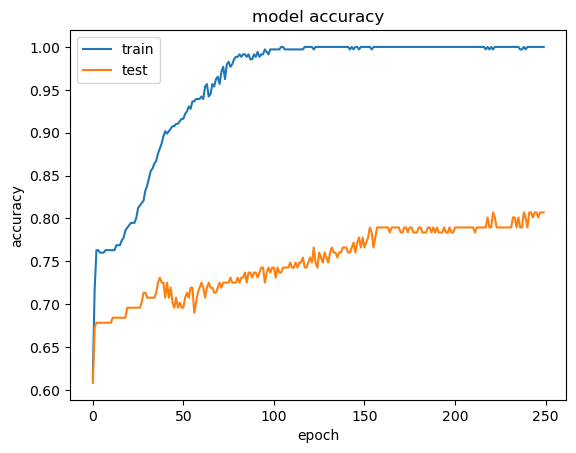

In [24]:
plot(model_fit3)

### Validation accuracy is less for model3

## We can consider model2 as final model 